In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ratio = np.linspace(0, 1, 10)
prices = [('adriaplin', .06488, .03988),
          ('e3napredni', .10151, .01009),
          ('e3zeleni', .08341, .04978),
          ('e3preprosti', .08923, .05499),
          ('eon zvesti', .07152, .04883),
          ('ece top', .06999, .05169),
          ('ece skupaj', .06499, .04599),
          ('ece sava', .08715, .05895),
          ('energija plus', .07299, .04239),
          ('ep eu', .06090, .04330),
          ('geni', .06490, .03599),
          ('ener lj', .06645, .04345)]



In [3]:
def calc(ratio, price_low, price_high):
    return ratio * price_low + (1 - ratio) * price_high

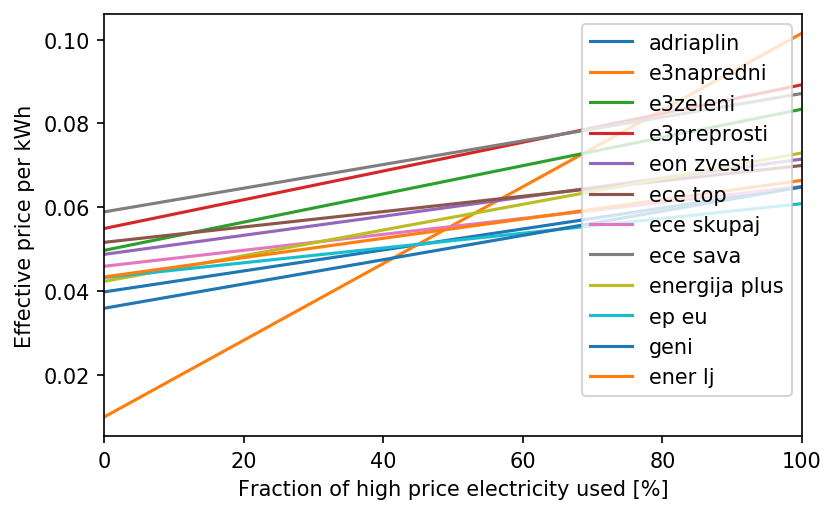

In [4]:
f, ax = plt.subplots(figsize=(6, 6/1.61), dpi=150)
for item in prices:
    plt.plot(ratio*100, calc(ratio, item[1], item[2]), label=item[0])
ax.legend(loc='best')
ax.set_ylabel('Effective price per kWh')
ax.set_xlabel('Fraction of high price electricity used [%]')
ax.set_xlim(0, 100);

In [5]:
class Energy_provider:
    def __init__(self, name, high_price, low_price, surcharge):
        self.name = name
        self.high_price = high_price
        self.low_price = low_price
        self.surcharge = surcharge
        
class Consumption:
    def __init__(self, high_consumption, low_consumption):
        self.high_consumption = high_consumption
        self.low_consumption = low_consumption

def cost(energy_provider, consumption):
    return energy_provider.high_price * consumption.high_consumption + \
        energy_provider.low_price * consumption.low_consumption + \
        energy_provider.surcharge

In [6]:
def calculate_costs(prices, consumption):
    costs = [[cost(x, consumption), x.name] for x in prices]
    return costs


def plot_costs(costs):
    y = np.array([x[0] for x in costs])
    sort = np.argsort(y)
    y = y[sort]
    labels = np.array([x[1] for x in costs], dtype=str)[sort]
    x = np.arange(y.size)
    f, ax = plt.subplots()
    
    ax.bar(x, y)
    plt.xticks(x, labels, rotation=90)
    ax.set_ylabel("cost (EUR)")

In [7]:
home_consumption = Consumption(2212, 2000)
prices = [Energy_provider('adriaplin', .06488, .03988, 0),
          Energy_provider('e3napredni', .10151, .01009, 0),
          Energy_provider('e3zeleni', .08341, .04978, 0),
          Energy_provider('e3preprosti', .08923, .05499, 0),
          Energy_provider('eon zvesti', .07152, .04883, 0),
          Energy_provider('ece top', .06999, .05169, 1.),
          Energy_provider('ece skupaj', .06499, .04599, 1.),
          Energy_provider('ece sava', .08715, .05895, .89),
          Energy_provider('energija plus', .07299, .04239, 0),
          Energy_provider('ep eu', .06090, .04330, 0),
          Energy_provider('geni', .06490, .03599, 1),
          Energy_provider('ener lj', .06645, .04345, 0)]



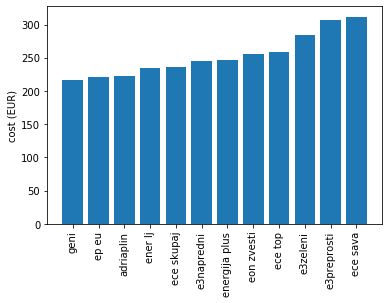

In [8]:
costs = calculate_costs(prices, home_consumption)

plot_costs(costs)